# EDA + Feature Engineering su dataset Housing
Feature engineering semplice e stupido, solo per capire i concetti

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


## EDA

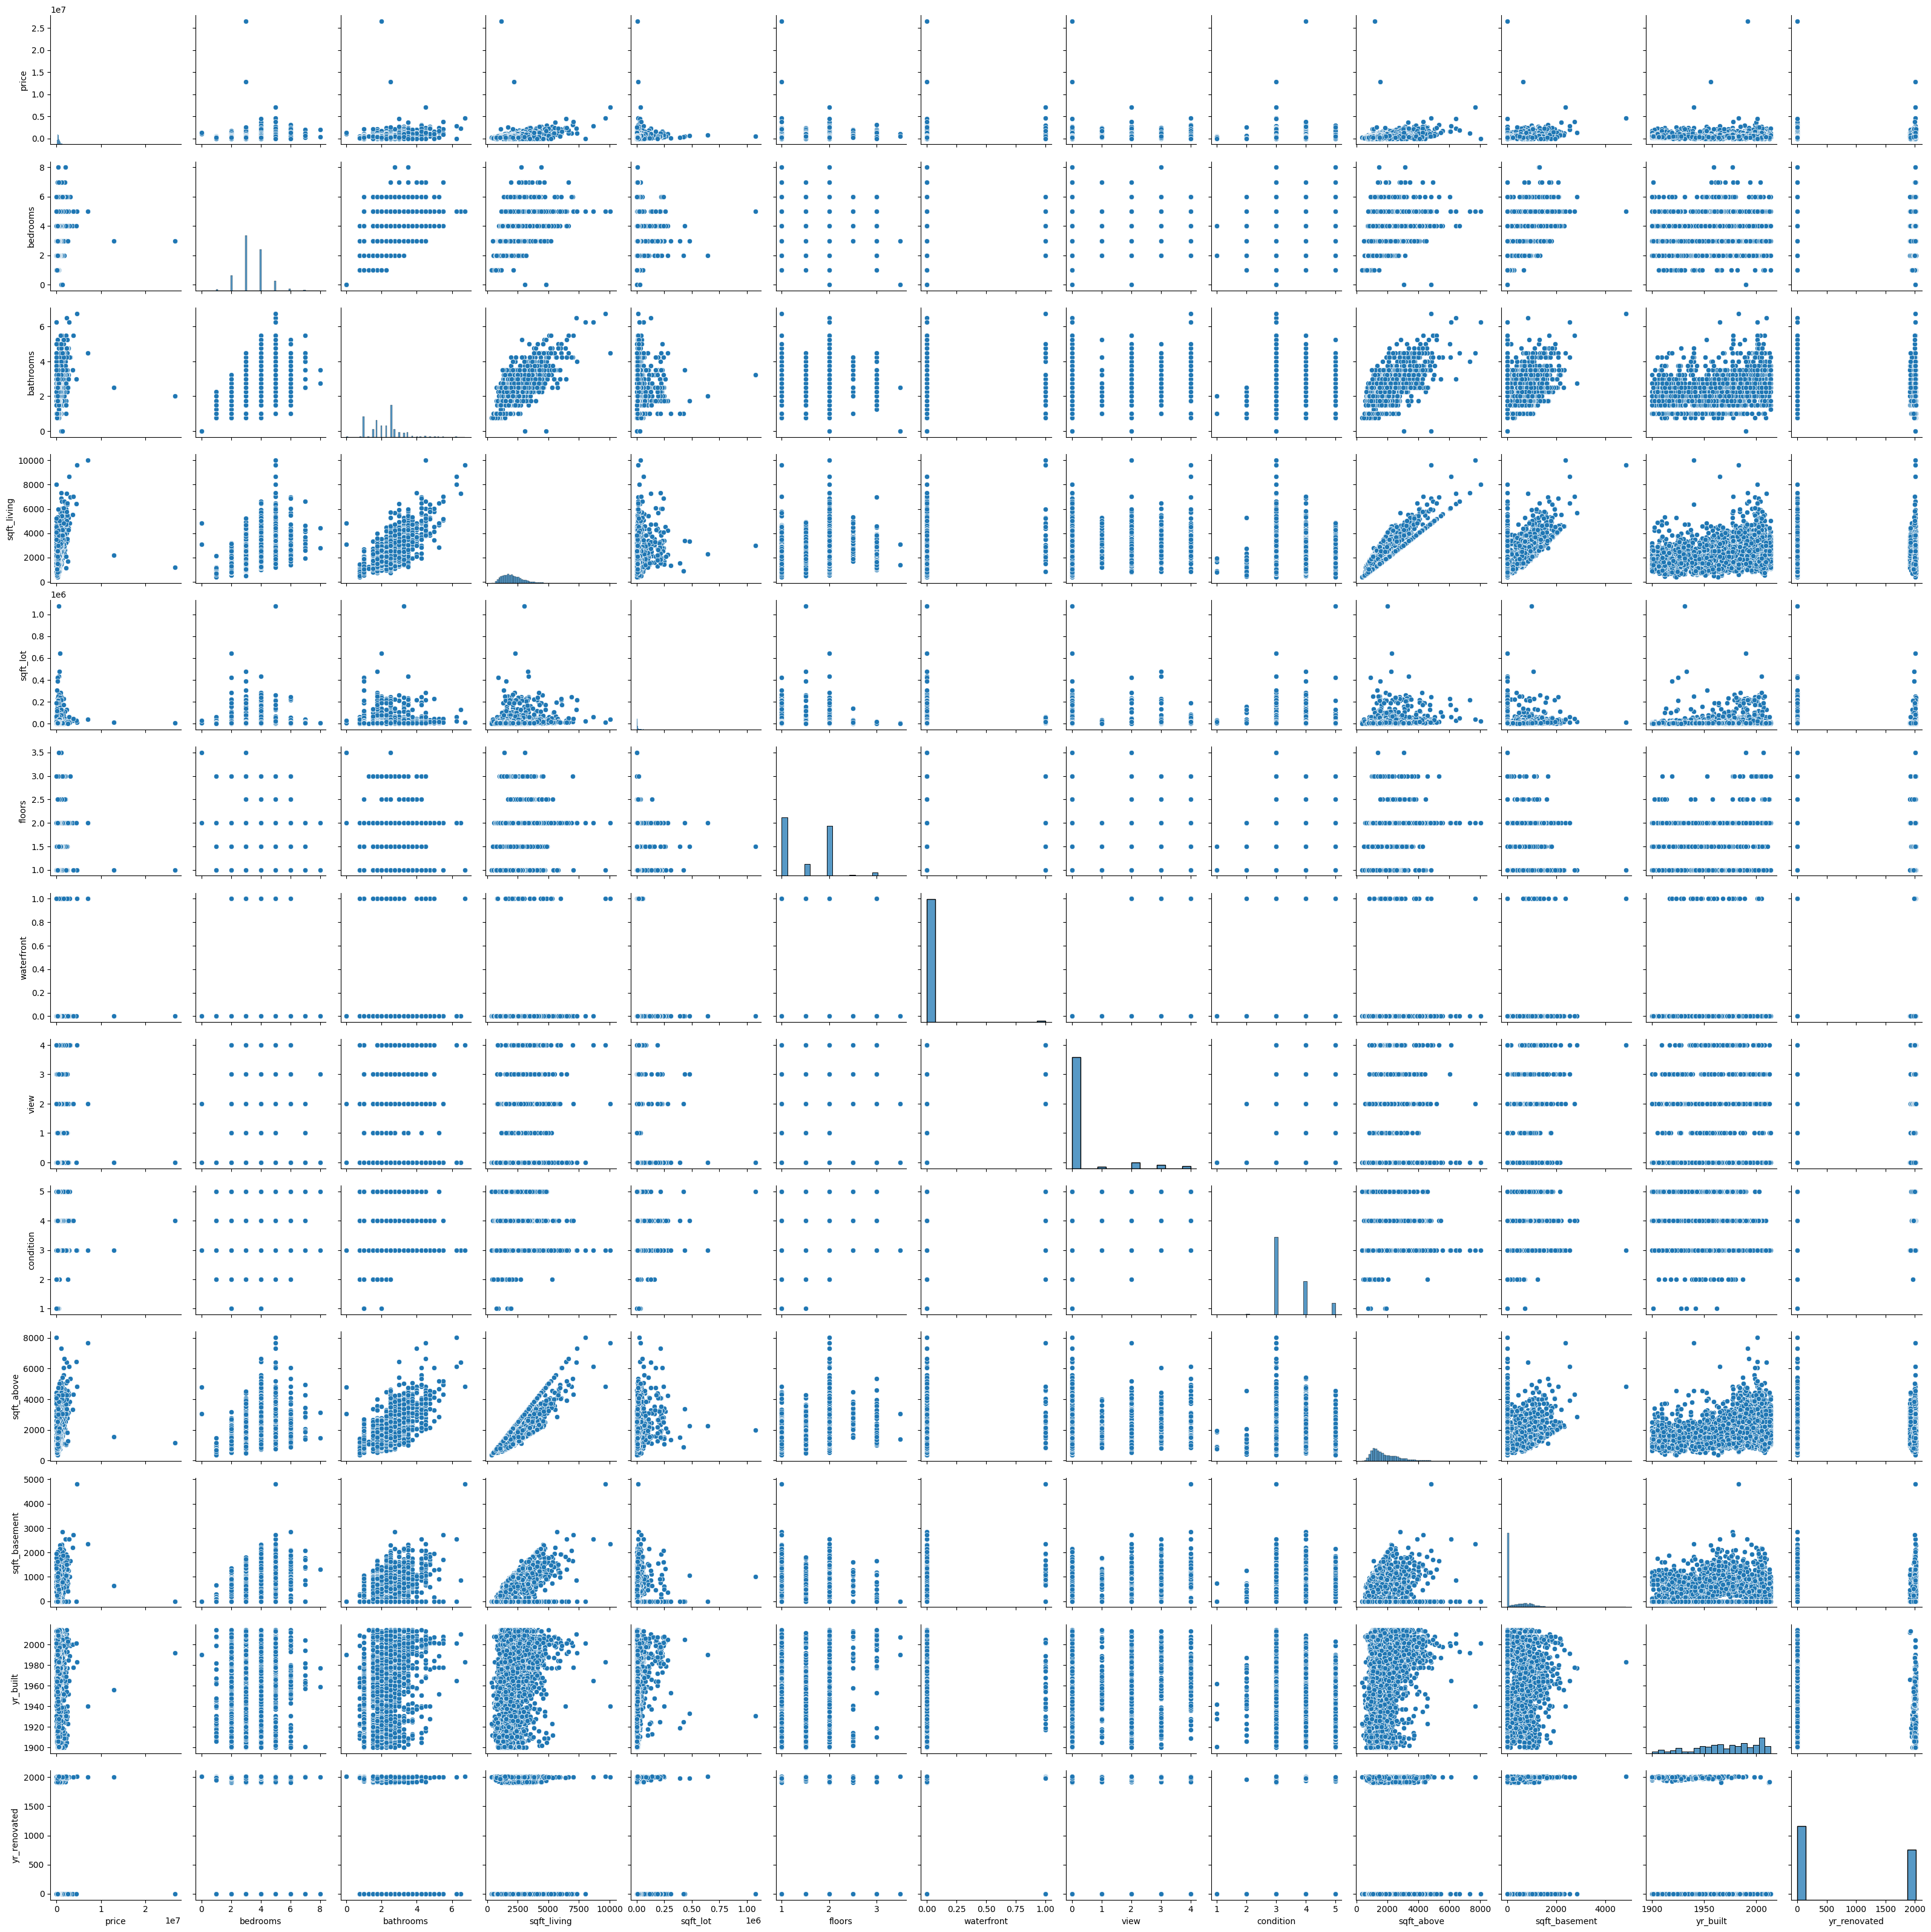

In [6]:
sns.pairplot(df)

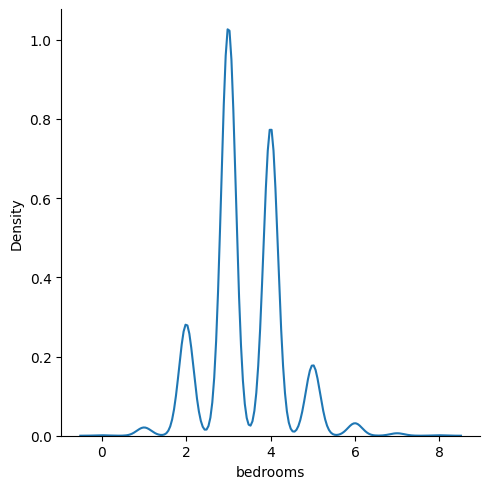

In [7]:
sns.displot(df['bedrooms'], kind='kde')

<Axes: xlabel='bedrooms', ylabel='price'>

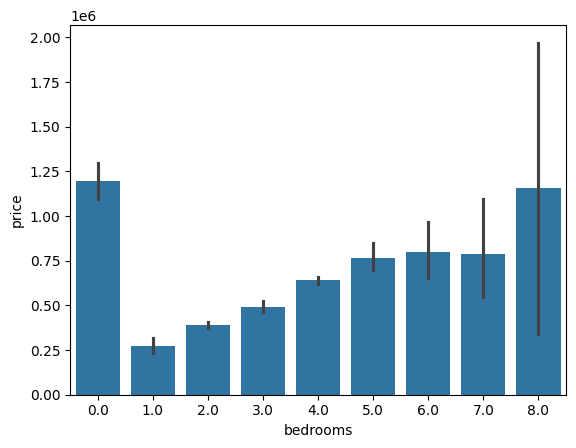

In [8]:
sns.barplot(data=df, x='bedrooms', y='price')

<Axes: >

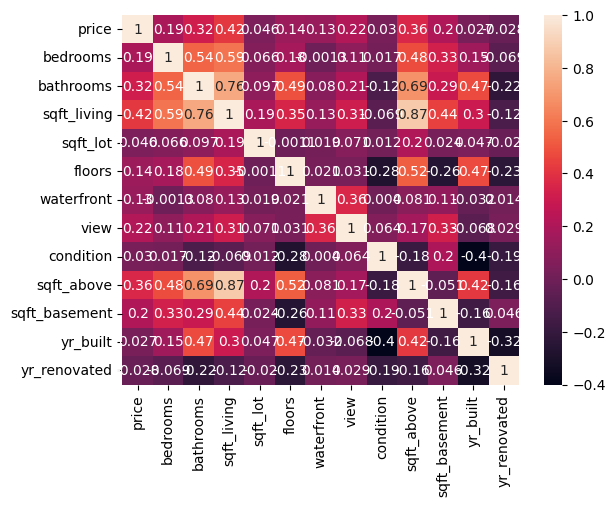

In [9]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

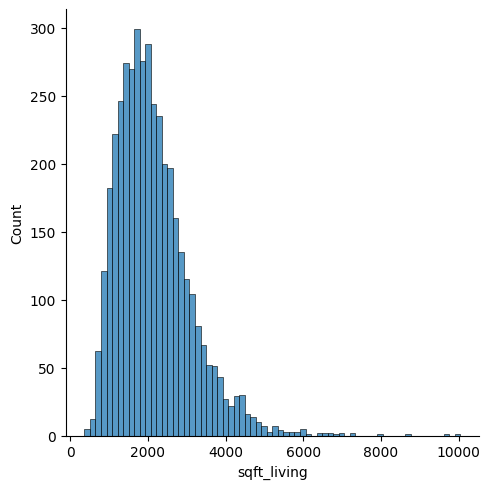

In [10]:
sns.displot(df['sqft_living'])

## Feature Engineering

### Feature Selection
Alcune colonne sono visibilmente inutili quindi le rimuovo subito

In [11]:
df.drop(columns=['date', 'yr_renovated', 'street', 'statezip', 'country', 'sqft_basement', 'sqft_above'], axis=1, inplace=True)

### Trasformazioni logiche 

In [12]:
import numpy as np
df['price'] = np.log(df['price']+1)

### Binning

In [13]:
df['sqft_living'] = pd.cut(df['sqft_living'], bins=[0,1500,4000,20000], labels=['small', 'medium', 'big'])

### Variabili Categoriali

#### One-Hot Encoding

In [14]:
df = pd.get_dummies(df, columns=['yr_built'], drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,city,...,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014
0,12.837347,3.0,2.00,small,1384,3.0,0,0,3,Seattle,...,False,False,False,True,False,False,False,False,False,False
1,13.592368,4.0,3.25,medium,159430,2.0,0,0,3,Carnation,...,False,False,True,False,False,False,False,False,False,False
2,14.621490,5.0,6.50,big,130017,2.0,0,0,3,Issaquah,...,False,False,False,False,False,True,False,False,False,False
3,12.688502,3.0,2.25,small,904,2.0,0,0,3,Seattle,...,False,False,True,False,False,False,False,False,False,False
4,13.217494,5.0,2.75,medium,7015,1.0,0,0,5,Seattle,...,False,False,False,False,False,False,False,False,False,False


#### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sqft_living'] = le.fit_transform(df['sqft_living'])

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,city,...,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014
0,12.837347,3.0,2.00,2,1384,3.0,0,0,3,Seattle,...,False,False,False,True,False,False,False,False,False,False
1,13.592368,4.0,3.25,1,159430,2.0,0,0,3,Carnation,...,False,False,True,False,False,False,False,False,False,False
2,14.621490,5.0,6.50,0,130017,2.0,0,0,3,Issaquah,...,False,False,False,False,False,True,False,False,False,False
3,12.688502,3.0,2.25,2,904,2.0,0,0,3,Seattle,...,False,False,True,False,False,False,False,False,False,False
4,13.217494,5.0,2.75,1,7015,1.0,0,0,5,Seattle,...,False,False,False,False,False,False,False,False,False,False


### Creazione nuove feature

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,city,...,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014
0,12.837347,3.0,2.00,2,1384,3.0,0,0,3,Seattle,...,False,False,False,True,False,False,False,False,False,False
1,13.592368,4.0,3.25,1,159430,2.0,0,0,3,Carnation,...,False,False,True,False,False,False,False,False,False,False
2,14.621490,5.0,6.50,0,130017,2.0,0,0,3,Issaquah,...,False,False,False,False,False,True,False,False,False,False
3,12.688502,3.0,2.25,2,904,2.0,0,0,3,Seattle,...,False,False,True,False,False,False,False,False,False,False
4,13.217494,5.0,2.75,1,7015,1.0,0,0,5,Seattle,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df['tot_rooms'] = df['bedrooms'] + df['bathrooms']